In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("seeds.csv")

In [3]:
c = df.corr()
c

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


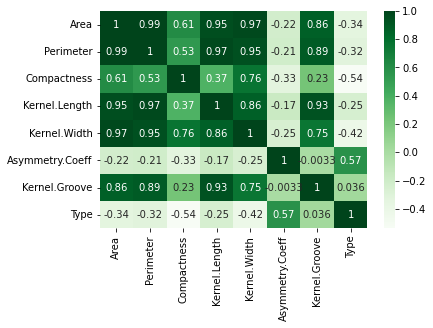

In [4]:
#Co-Relation Matrix
sns.heatmap(c,annot=True,cmap='Greens')
plt.show()

In [5]:
print(df.describe())
print(df.isnull().sum())

             Area   Perimeter  Compactness  Kernel.Length  Kernel.Width  \
count  199.000000  199.000000   199.000000     199.000000    199.000000   
mean    14.918744   14.595829     0.870811       5.643151      3.265533   
std      2.919976    1.310445     0.023320       0.443593      0.378322   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.330000   13.470000     0.857100       5.267000      2.954500   
50%     14.430000   14.370000     0.873400       5.541000      3.245000   
75%     17.455000   15.805000     0.886800       6.002000      3.564500   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry.Coeff  Kernel.Groove        Type  
count       199.000000     199.000000  199.000000  
mean          3.699217       5.420653    1.994975  
std           1.471102       0.492718    0.813382  
min           0.765100       4.519000    1.000000  
25%           2.570000       5.046000    1.000000  
50%         

In [6]:
#Splitting The Data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#Model for Decision Tree using Entropy
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
model=clf_entropy.fit(X_train,y_train)

In [8]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [9]:
text_representation_entropy = tree.export_text(clf_entropy)
print(text_representation_entropy)

|--- feature_6 <= 5.58
|   |--- feature_0 <= 13.39
|   |   |--- feature_5 <= 3.57
|   |   |   |--- class: 1
|   |   |--- feature_5 >  3.57
|   |   |   |--- class: 3
|   |--- feature_0 >  13.39
|   |   |--- feature_4 <= 3.47
|   |   |   |--- class: 1
|   |   |--- feature_4 >  3.47
|   |   |   |--- class: 1
|--- feature_6 >  5.58
|   |--- class: 2



In [10]:
#Model for Decision Tree using Gini Index
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
model_gini=clf_gini.fit(X_train,y_train)

In [11]:
model_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [12]:
text_representation_gini = tree.export_text(clf_gini)
print(text_representation_gini)

|--- feature_6 <= 5.58
|   |--- feature_0 <= 13.39
|   |   |--- feature_6 <= 4.79
|   |   |   |--- class: 1
|   |   |--- feature_6 >  4.79
|   |   |   |--- class: 3
|   |--- feature_0 >  13.39
|   |   |--- feature_4 <= 3.47
|   |   |   |--- class: 1
|   |   |--- feature_4 >  3.47
|   |   |   |--- class: 1
|--- feature_6 >  5.58
|   |--- class: 2



In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
import graphviz

[Text(209.25, 190.26, 'X[6] <= 5.576\nentropy = 1.581\nsamples = 159\nvalue = [52, 58, 49]'),
 Text(167.4, 135.9, 'X[0] <= 13.395\nentropy = 1.069\nsamples = 102\nvalue = [52, 1, 49]'),
 Text(83.7, 81.53999999999999, 'X[5] <= 3.566\nentropy = 0.623\nsamples = 58\nvalue = [9, 0, 49]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.998\nsamples = 17\nvalue = [9, 0, 8]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 41\nvalue = [0, 0, 41]'),
 Text(251.10000000000002, 81.53999999999999, 'X[4] <= 3.465\nentropy = 0.156\nsamples = 44\nvalue = [43, 1, 0]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(251.10000000000002, 135.9, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57, 0]')]

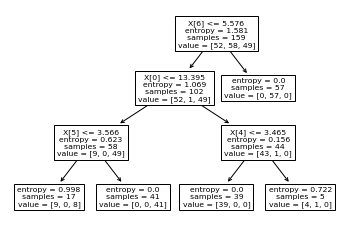

In [19]:
tree.plot_tree(model)

[Text(209.25, 190.26, 'X[6] <= 5.576\ngini = 0.665\nsamples = 159\nvalue = [52, 58, 49]'),
 Text(167.4, 135.9, 'X[0] <= 13.395\ngini = 0.509\nsamples = 102\nvalue = [52, 1, 49]'),
 Text(83.7, 81.53999999999999, 'X[6] <= 4.789\ngini = 0.262\nsamples = 58\nvalue = [9, 0, 49]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.14\nsamples = 53\nvalue = [4, 0, 49]'),
 Text(251.10000000000002, 81.53999999999999, 'X[4] <= 3.465\ngini = 0.044\nsamples = 44\nvalue = [43, 1, 0]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 57\nvalue = [0, 57, 0]')]

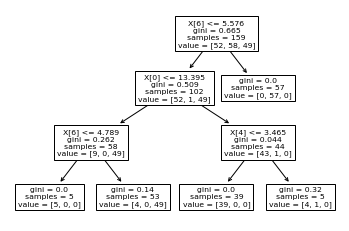

In [18]:
tree.plot_tree(model_gini)